<a href="https://colab.research.google.com/github/vijaybalaji0606/prodigy_infotech_tasks/blob/main/Food_Classification_and_Calorie_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip archive\ \(3\).zip

Archive:  archive (3).zip
  inflating: data/food-101-tiny/train/apple_pie/1005649.jpg  
  inflating: data/food-101-tiny/train/apple_pie/1014775.jpg  
  inflating: data/food-101-tiny/train/apple_pie/1026328.jpg  
  inflating: data/food-101-tiny/train/apple_pie/1028787.jpg  
  inflating: data/food-101-tiny/train/apple_pie/1043283.jpg  
  inflating: data/food-101-tiny/train/apple_pie/1050519.jpg  
  inflating: data/food-101-tiny/train/apple_pie/1057749.jpg  
  inflating: data/food-101-tiny/train/apple_pie/1057810.jpg  
  inflating: data/food-101-tiny/train/apple_pie/1072416.jpg  
  inflating: data/food-101-tiny/train/apple_pie/1074856.jpg  
  inflating: data/food-101-tiny/train/apple_pie/1074942.jpg  
  inflating: data/food-101-tiny/train/apple_pie/1076891.jpg  
  inflating: data/food-101-tiny/train/apple_pie/1077610.jpg  
  inflating: data/food-101-tiny/train/apple_pie/1077964.jpg  
  inflating: data/food-101-tiny/train/apple_pie/1088809.jpg  
  inflating: data/food-101-tiny/train/apple_

In [ ]:
!pip install -q tensorflow tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.metrics import classification_report

In [ ]:
train_dir = '/content/food-101-tiny/train'
valid_dir = '/content/food-101-tiny/valid'

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    '/content/data/food-101-tiny/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
valid_gen = valid_datagen.flow_from_directory(
    '/content/data/food-101-tiny/valid',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

class_names = list(train_gen.class_indices.keys())

Found 1500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
outputs = Dense(len(class_names), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=5
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1074 - loss: 2.3546

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 218s 4s/step - accuracy: 0.1072 - loss: 2.3544 - val_accuracy: 0.1000 - val_loss: 2.3292
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.1006 - loss: 2.3270 - val_accuracy: 0.1000 - val_loss: 2.3103
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.1101 - loss: 2.3179 - val_accuracy: 0.1000 - val_loss: 2.3125
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 0.0922 - loss: 2.3215 - val_accuracy: 0.1000 - val_loss: 2.3063
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.1012 - loss: 2.3079 - val_accuracy: 0.1000 - val_loss: 2.3027


In [ ]:
val_loss, val_acc = model.evaluate(valid_gen)
print(f"\nValidation Accuracy: {val_acc:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.0841 - loss: 2.3424

Validation Accuracy: 0.10


In [ ]:
food_to_calories = {
    'apple_pie': 296,
    'bibimbap': 560,
    'cannoli': 260,
    'edamame': 120,
    'falafel': 333,
    'french_toast': 149,
    'ice_cream': 137,
    'ramen': 436,
    'sushi': 200,
    'tiramisu': 240
}

def predict_and_estimate(image_path):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_batch = np.expand_dims(img_array, axis=0)

    preds = model.predict(img_batch)[0]
    class_idx = np.argmax(preds)
    food_name = class_names[class_idx]
    calories = food_to_calories.get(food_name, "N/A")

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{food_name} - Est. {calories} kcal")
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


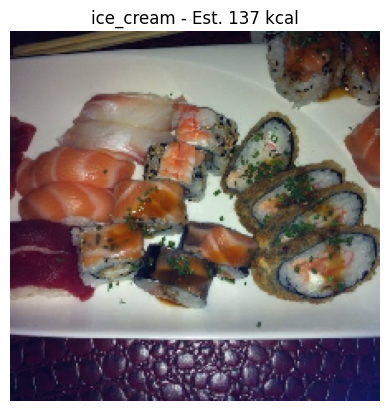

In [ ]:
test_image_path = '/content/data/food-101-tiny/valid/sushi/1654256.jpg'
predict_and_estimate(test_image_path)